<img src="datamecum_logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">Módulo Análisis Exploratorio de Datos.</h2></font> 
<font color="#6E6E6E"><h2 align="left">Análisis univariante y bivariante.</h2></font> 

#### Marcelino Martínez Sober, Regino Barranquero

Vamos a considerar que los datos ya han sido importado a un data frame y vamos a ver como se realizan con muchas operaciones habituales.

In [70]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.__version__

'1.5.1'


+ Cargamos el fichero `flights.csv` almacenado en la carpeta `data`
+ Mostramos los primeros y últimos elementos así como información del registro.
+ Echamos un vistazo a las dimensiones del conjunto.


In [2]:
flights = pd.read_csv('data/flights.csv')
flights.head()

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute             time_hour  
0      1400     5      15  2013-01-01T10:00:00Z  
1      1416     5      29  2013-01-01T10:00:00Z  
2      1089     5      40  2013-01-01T10:00:00Z  
3      1576     5      45  2013-01-01T10:00:00Z  
4       762     6       0  2013-01-01T11:00:00Z

In [3]:
flights.tail()

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
336771            1634        NaN      9E    3393     NaN    JFK  DCA   
336772            2312        NaN      9E    3525     NaN    LGA  SYR   
336773            1330        NaN      MQ    3461  N535MQ    LGA  BNA   
336774            1344        NaN      MQ    3572  N511MQ    LGA  CLE   
336775            1020        NaN      MQ    3531  N839MQ    LGA  RDU   

        air_time  distance  hour  minute             time_hour  
336771       NaN       213    14      55  2013-09-30T18:00:00Z  
336772       NaN       198    22       0  2013-10-01T02:00:00Z  
336773       NaN       764    12      10  2013-09-30T16:00:00Z  
336774       NaN       419    11      59  2013-09-30T15:00:00Z  
336775       NaN       431     8      40  2013-09-30T12:00:00Z

In [4]:
flights.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object

In [5]:
(Filas,col)=flights.shape

f"El conjunto tiene {Filas} registros y {col} variables cuyos nombres son {[col for col in flights.columns]} "

"El conjunto tiene 336776 registros y 19 variables cuyos nombres son ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour'] "



|  **Name of data type**  |    **Type of data**   |
|:----------:|:-------------:|
|   float64  |  real numbers |
|  category  |   categories  |
| datetime64 |   date times  |
|    int64   |    integers   |
|    bool    | True or False |
|   string   |      text     |


In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

## Análisis univariante

In [7]:
flights.describe()

year          month            day       dep_time  sched_dep_time  \
count  336776.0  336776.000000  336776.000000  328521.000000   336776.000000   
mean     2013.0       6.548510      15.710787    1349.109947     1344.254840   
std         0.0       3.414457       8.768607     488.281791      467.335756   
min      2013.0       1.000000       1.000000       1.000000      106.000000   
25%      2013.0       4.000000       8.000000     907.000000      906.000000   
50%      2013.0       7.000000      16.000000    1401.000000     1359.000000   
75%      2013.0      10.000000      23.000000    1744.000000     1729.000000   
max      2013.0      12.000000      31.000000    2400.000000     2359.000000   

           dep_delay       arr_time  sched_arr_time      arr_delay  \
count  328521.000000  328063.000000   336776.000000  327346.000000   
mean       12.639070    1502.054999     1536.380220       6.895377   
std        40.210061     533.264132      497.457142      44.633292   
min       -43.000000       1.000000        1.000000     -86.000000   
25%        -5.000000    1104.000000     1124.000000     -17.000000   
50%        -2.000000    1535.000000     1556.000000      -5.000000   
75%        11.000000    1940.000000     1945.000000      14.000000   
max      1301.000000    2400.000000     2359.000000    1272.000000   

              flight       air_time       distance           hour  \
count  336776.000000  327346.000000  336776.000000  336776.000000   
mean     1971.923620     150.686460    1039.912604      13.180247   
std      1632.471938      93.688305     733.233033       4.661316   
min         1.000000      20.000000      17.000000       1.000000   
25%       553.000000      82.000000     502.000000       9.000000   
50%      1496.000000     129.000000     872.000000      13.000000   
75%      3465.000000     192.000000    1389.000000      17.000000   
max      8500.000000     695.000000    4983.000000      23.000000   

              minute  
count  336776.000000  
mean       26.230100  
std        19.300846  
min         0.000000  
25%         8.000000  
50%        29.000000  
75%        44.000000  
max        59.000000

Como veis describe() no ha indicado ninguna métrica de las variables no numéricas.

In [8]:
flights["time_hour"] = pd.to_datetime(flights["time_hour"], format="%Y-%m-%d %H:%M:%S")
flights["origin"] = flights["origin"].astype('category')
flights.describe()

year          month            day       dep_time  sched_dep_time  \
count  336776.0  336776.000000  336776.000000  328521.000000   336776.000000   
mean     2013.0       6.548510      15.710787    1349.109947     1344.254840   
std         0.0       3.414457       8.768607     488.281791      467.335756   
min      2013.0       1.000000       1.000000       1.000000      106.000000   
25%      2013.0       4.000000       8.000000     907.000000      906.000000   
50%      2013.0       7.000000      16.000000    1401.000000     1359.000000   
75%      2013.0      10.000000      23.000000    1744.000000     1729.000000   
max      2013.0      12.000000      31.000000    2400.000000     2359.000000   

           dep_delay       arr_time  sched_arr_time      arr_delay  \
count  328521.000000  328063.000000   336776.000000  327346.000000   
mean       12.639070    1502.054999     1536.380220       6.895377   
std        40.210061     533.264132      497.457142      44.633292   
min       -43.000000       1.000000        1.000000     -86.000000   
25%        -5.000000    1104.000000     1124.000000     -17.000000   
50%        -2.000000    1535.000000     1556.000000      -5.000000   
75%        11.000000    1940.000000     1945.000000      14.000000   
max      1301.000000    2400.000000     2359.000000    1272.000000   

              flight       air_time       distance           hour  \
count  336776.000000  327346.000000  336776.000000  336776.000000   
mean     1971.923620     150.686460    1039.912604      13.180247   
std      1632.471938      93.688305     733.233033       4.661316   
min         1.000000      20.000000      17.000000       1.000000   
25%       553.000000      82.000000     502.000000       9.000000   
50%      1496.000000     129.000000     872.000000      13.000000   
75%      3465.000000     192.000000    1389.000000      17.000000   
max      8500.000000     695.000000    4983.000000      23.000000   

              minute  
count  336776.000000  
mean       26.230100  
std        19.300846  
min         0.000000  
25%         8.000000  
50%        29.000000  
75%        44.000000  
max        59.000000

In [9]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   year            336776 non-null  int64              
 1   month           336776 non-null  int64              
 2   day             336776 non-null  int64              
 3   dep_time        328521 non-null  float64            
 4   sched_dep_time  336776 non-null  int64              
 5   dep_delay       328521 non-null  float64            
 6   arr_time        328063 non-null  float64            
 7   sched_arr_time  336776 non-null  int64              
 8   arr_delay       327346 non-null  float64            
 9   carrier         336776 non-null  object             
 10  flight          336776 non-null  int64              
 11  tailnum         334264 non-null  object             
 12  origin          336776 non-null  category           
 13  dest          

Aunque hayamos modificado los tipos de dato a formato fecha y categórico, describe() sigue sin sacar ningún estadístico al no ser datos de tipos numéricos (int, float).

Si nuestro dataFrame contiene muchas columnas, puede que nos sea conveniente transponer el resultado de describe()

In [10]:
flights.describe().T

count         mean          std     min     25%     50%  \
year            336776.0  2013.000000     0.000000  2013.0  2013.0  2013.0   
month           336776.0     6.548510     3.414457     1.0     4.0     7.0   
day             336776.0    15.710787     8.768607     1.0     8.0    16.0   
dep_time        328521.0  1349.109947   488.281791     1.0   907.0  1401.0   
sched_dep_time  336776.0  1344.254840   467.335756   106.0   906.0  1359.0   
dep_delay       328521.0    12.639070    40.210061   -43.0    -5.0    -2.0   
arr_time        328063.0  1502.054999   533.264132     1.0  1104.0  1535.0   
sched_arr_time  336776.0  1536.380220   497.457142     1.0  1124.0  1556.0   
arr_delay       327346.0     6.895377    44.633292   -86.0   -17.0    -5.0   
flight          336776.0  1971.923620  1632.471938     1.0   553.0  1496.0   
air_time        327346.0   150.686460    93.688305    20.0    82.0   129.0   
distance        336776.0  1039.912604   733.233033    17.0   502.0   872.0   
hour            336776.0    13.180247     4.661316     1.0     9.0    13.0   
minute          336776.0    26.230100    19.300846     0.0     8.0    29.0   

                   75%     max  
year            2013.0  2013.0  
month             10.0    12.0  
day               23.0    31.0  
dep_time        1744.0  2400.0  
sched_dep_time  1729.0  2359.0  
dep_delay         11.0  1301.0  
arr_time        1940.0  2400.0  
sched_arr_time  1945.0  2359.0  
arr_delay         14.0  1272.0  
flight          3465.0  8500.0  
air_time         192.0   695.0  
distance        1389.0  4983.0  
hour              17.0    23.0  
minute            44.0    59.0

### Ejercicio

¿Hay alguna manera de obtener estadísticos de todas las variables en lugar de solo las numéricas?

Si modificamos el parámetro include podemos forzar a que muestre estadísticos de todas las variables

In [11]:
flights.describe(include='all').T

<ipython-input-11-3370c39f42e1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  flights.describe(include='all').T


count unique                        top    freq  \
year            336776.0    NaN                        NaN     NaN   
month           336776.0    NaN                        NaN     NaN   
day             336776.0    NaN                        NaN     NaN   
dep_time        328521.0    NaN                        NaN     NaN   
sched_dep_time  336776.0    NaN                        NaN     NaN   
dep_delay       328521.0    NaN                        NaN     NaN   
arr_time        328063.0    NaN                        NaN     NaN   
sched_arr_time  336776.0    NaN                        NaN     NaN   
arr_delay       327346.0    NaN                        NaN     NaN   
carrier           336776     16                         UA   58665   
flight          336776.0    NaN                        NaN     NaN   
tailnum           334264   4043                     N725MQ     575   
origin            336776      3                        EWR  120835   
dest              336776    105                        ORD   17283   
air_time        327346.0    NaN                        NaN     NaN   
distance        336776.0    NaN                        NaN     NaN   
hour            336776.0    NaN                        NaN     NaN   
minute          336776.0    NaN                        NaN     NaN   
time_hour         336776   6936  2013-09-13 12:00:00+00:00      94   

                                   first                      last  \
year                                 NaT                       NaT   
month                                NaT                       NaT   
day                                  NaT                       NaT   
dep_time                             NaT                       NaT   
sched_dep_time                       NaT                       NaT   
dep_delay                            NaT                       NaT   
arr_time                             NaT                       NaT   
sched_arr_time                       NaT                       NaT   
arr_delay                            NaT                       NaT   
carrier                              NaT                       NaT   
flight                               NaT                       NaT   
tailnum                              NaT                       NaT   
origin                               NaT                       NaT   
dest                                 NaT                       NaT   
air_time                             NaT                       NaT   
distance                             NaT                       NaT   
hour                                 NaT                       NaT   
minute                               NaT                       NaT   
time_hour      2013-01-01 10:00:00+00:00 2014-01-01 04:00:00+00:00   

                       mean          std     min     25%     50%     75%  \
year                 2013.0          0.0  2013.0  2013.0  2013.0  2013.0   
month               6.54851     3.414457     1.0     4.0     7.0    10.0   
day               15.710787     8.768607     1.0     8.0    16.0    23.0   
dep_time        1349.109947   488.281791     1.0   907.0  1401.0  1744.0   
sched_dep_time   1344.25484   467.335756   106.0   906.0  1359.0  1729.0   
dep_delay          12.63907    40.210061   -43.0    -5.0    -2.0    11.0   
arr_time        1502.054999   533.264132     1.0  1104.0  1535.0  1940.0   
sched_arr_time   1536.38022   497.457142     1.0  1124.0  1556.0  1945.0   
arr_delay          6.895377    44.633292   -86.0   -17.0    -5.0    14.0   
carrier                 NaN          NaN     NaN     NaN     NaN     NaN   
flight           1971.92362  1632.471938     1.0   553.0  1496.0  3465.0   
tailnum                 NaN          NaN     NaN     NaN     NaN     NaN   
origin                  NaN          NaN     NaN     NaN     NaN     NaN   
dest                    NaN          NaN     NaN     NaN     NaN     NaN   
air_time          150.68646    93.688305    20.0    82.0   129.0   192.0   
d

In [12]:
flights.describe(include='all', datetime_is_numeric=True).T

count unique     top    freq  \
year            336776.0    NaN     NaN     NaN   
month           336776.0    NaN     NaN     NaN   
day             336776.0    NaN     NaN     NaN   
dep_time        328521.0    NaN     NaN     NaN   
sched_dep_time  336776.0    NaN     NaN     NaN   
dep_delay       328521.0    NaN     NaN     NaN   
arr_time        328063.0    NaN     NaN     NaN   
sched_arr_time  336776.0    NaN     NaN     NaN   
arr_delay       327346.0    NaN     NaN     NaN   
carrier           336776     16      UA   58665   
flight          336776.0    NaN     NaN     NaN   
tailnum           334264   4043  N725MQ     575   
origin            336776      3     EWR  120835   
dest              336776    105     ORD   17283   
air_time        327346.0    NaN     NaN     NaN   
distance        336776.0    NaN     NaN     NaN   
hour            336776.0    NaN     NaN     NaN   
minute          336776.0    NaN     NaN     NaN   
time_hour         336776    NaN     NaN     NaN   

                                               mean  \
year                                         2013.0   
month                                       6.54851   
day                                       15.710787   
dep_time                                1349.109947   
sched_dep_time                           1344.25484   
dep_delay                                  12.63907   
arr_time                                1502.054999   
sched_arr_time                           1536.38022   
arr_delay                                  6.895377   
carrier                                         NaN   
flight                                   1971.92362   
tailnum                                         NaN   
origin                                          NaN   
dest                                            NaN   
air_time                                  150.68646   
distance                                1039.912604   
hour                                      13.180247   
minute                                      26.2301   
time_hour       2013-07-03 09:22:54.639523072+00:00   

                                      min                        25%  \
year                               2013.0                     2013.0   
month                                 1.0                        4.0   
day                                   1.0                        8.0   
dep_time                              1.0                      907.0   
sched_dep_time                      106.0                      906.0   
dep_delay                           -43.0                       -5.0   
arr_time                              1.0                     1104.0   
sched_arr_time                        1.0                     1124.0   
arr_delay                           -86.0                      -17.0   
carrier                               NaN                        NaN   
flight                                1.0                      553.0   
tailnum                               NaN                        NaN   
origin                                NaN                        NaN   
dest                                  NaN                        NaN   
air_time                             20.0                       82.0   
distance                             17.0                      502.0   
hour                                  1.0                        9.0   
minute                                0.0                        8.0   
time_hour       2013-01-01 10:00:00+00:00  2013-04-04 17:00:00+00:00   

                                      50%                        75%  \
year                               2013.0                     2013.0   
month                                 7.0                       10.0   
day                                  16.0                       23.0   
dep_time                           1401.0                     1744.0   
sched_dep_time                     1359.0                     1729.0   
dep_delay               

Vemos que trata a las variables object y categorical de la misma manera

También podemos obtener las tablas de frecuencias de las variables con la función value_counts()

In [13]:
flights.origin.value_counts()

EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64

In [14]:
flights.arr_delay.value_counts()

-13.0      7177
-10.0      7088
-12.0      7046
-14.0      6975
-11.0      6863
           ... 
 435.0        1
 456.0        1
 428.0        1
 516.0        1
 1007.0       1
Name: arr_delay, Length: 577, dtype: int64

También podemos contar cuantas veces se repite cada valor de una variable continua, pero si tiene muchos valores diferentes esto no es práctico.

In [16]:
pd.cut(flights.arr_delay, 10).value_counts()

(-87.358, 49.8]     293108
(49.8, 185.6]        30699
(185.6, 321.4]        3088
(321.4, 457.2]         377
(457.2, 593.0]          33
(728.8, 864.6]          19
(593.0, 728.8]          12
(864.6, 1000.4]          6
(1000.4, 1136.2]         3
(1136.2, 1272.0]         1
Name: arr_delay, dtype: int64

Las funciones cut() y qcut() nos sirven para discretizar variables continuas, la primera en intervalos equiespaciados y la segunda por los quantiles que indequemos

In [17]:
pd.qcut(flights.arr_delay, 10).value_counts()

(-86.001, -26.0]    35635
(-26.0, -19.0]      35240
(-5.0, 1.0]         33844
(-19.0, -14.0]      33396
(-10.0, -5.0]       33128
(1.0, 9.0]          32935
(21.0, 52.0]        32636
(52.0, 1272.0]      32323
(9.0, 21.0]         30035
(-14.0, -10.0]      28174
Name: arr_delay, dtype: int64

## Gráficos de barras para variables categóricas

Vamos a seleccionar por ejemplo la variable origin

In [18]:
flights.origin.plot.bar()

TypeError: no numeric data to plot

Para poder hacer el gráfico necesitamos contar primero cuantos valores hay de cada categoría con la función value_counts()

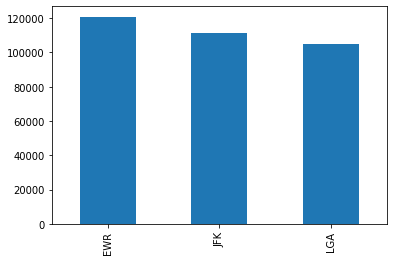

In [18]:
flights.origin.value_counts().plot.bar()
plt.show()

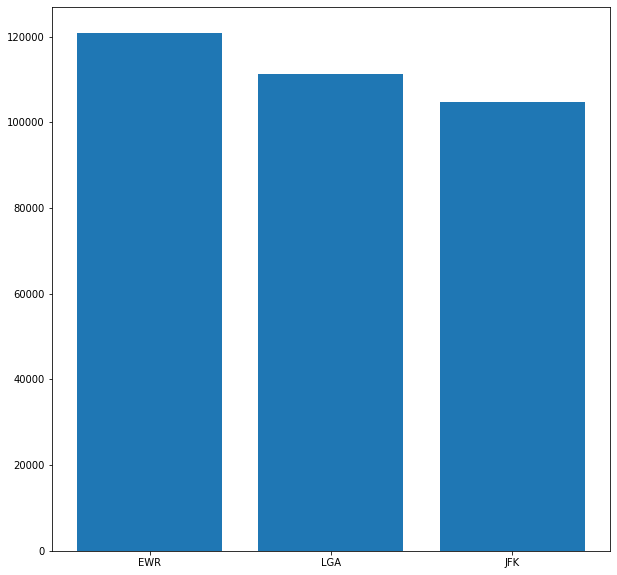

In [19]:
plt.figure(figsize=(10, 10))

plt.bar(flights.origin.unique(), flights.origin.value_counts())
plt.show()

El método incluído en pandas entiende el gráfico que queremos hacer y directamente nos lo representa, sin embargo al usar matplotlib tenemos que indicarle tanto eje x como altura de las barras

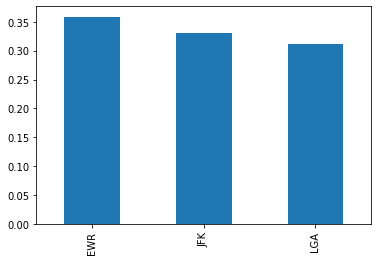

In [20]:
flights.origin.value_counts(normalize=True).plot.bar()
plt.show()

Con normalize obtenemos las frecuencias relativas en lugar del valor absoluto

## Ejercicio

1.- Discretiza la variable air_time en 5 intervalos con las funciones cut() y qcut().

2.- Genera dos gráficos de barras, uno para cada división. ¿Por qué salen así?¿Es lo que esperabas?

3.- Cambia los nombres de los grupos a otros más legibles (como grupo 1, 2,.. o cuantil 1, 2,...).

4.- Representa ambos en la misma gráfica. En este caso podemos comparar la discretización al estar hablando de la misma variable.

5.- Representa ahora gráficos de barras para las variables categóricas origin, dest y carrier. ¿De qué origen salen más vuelos?¿A qué destino van más vuelos?¿Cuál es la aerolínea que menos vuelos realizó?

6.- Cambia ahora estos gráficos por barras horizontales reordenando las categorías de menor a mayor.

## Histograma para distribuciones continuas de variables

Vamos a representar el histograma de la variable air_time

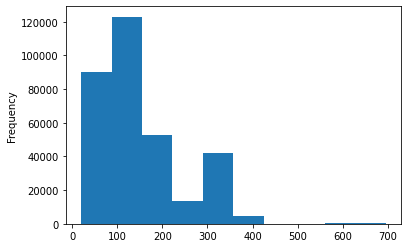

In [26]:
flights.air_time.plot.hist()
plt.show()

Por defecto la función hist() nos divide el rango de la variable en 10 intervalos, pero la mayoría de las veces nos interesa tener una mejor resolución de la distribución. Esto se consigue indicando el número de bins que queremos.

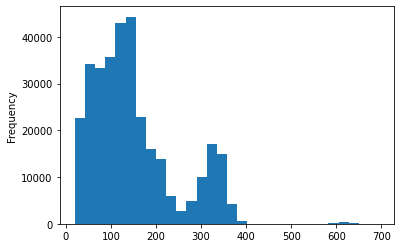

In [27]:
flights.air_time.plot.hist(bins=30)
plt.show()

También podemos usar esta función sobre el dataset completo, obteniendo un histograma de todas las variables.

## Ejercicio

Intenta obtener un histograma de todas las variables del dataset a la vez, de forma que sean más o menos visibles aunque se solapen.

1.- ¿Es una representación buena?¿Qué está ocurriendo?¿Son visibles todas las variables?¿Por qué?

2.- Selecciona las variables arr_time y dep_time para obtener el histograma de ambas ellas a la vez.

3.- ¿Hay algún gráfico similar al histograma que mejore la visualización?

4.- Obtén el sesgo y la kurtosis de las distribuciones de las variables continuas asociadas a los histogramas.

## Boxplot

Gráfico muy útil ya que nos aporta más información de la distribución, como los quartiles y outliers

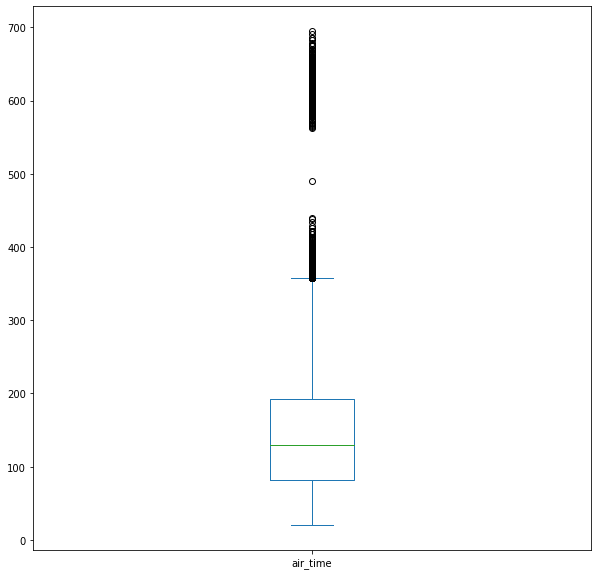

In [31]:
plt.figure(figsize=(10, 10))
flights.air_time.plot.box(ax=plt.gca())
plt.show()

## pandas profiling

Una librería muy interesante es pandas profiling, que nos genera automáticamente un análisis univariante de todas las variables de nuestro dataFrame.

Si no tenemos la librería instalada procedemos a instalarla a través de pip o conda.

In [32]:
#!pip install pandas-profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(flights, minimal=True, title="Profiling Report: Flights Dataset")
profile.to_notebook_iframe()

Además de los gráficos, pandas también nos incluye funciones para calcular parámetros asociados a estas como los que hemos visto de sesgo y kurtosis

## Ejercicio

Abre el archivo CardioGoodFitness.csv y haz un análisis univariantes de las variables.

Representa una gráfica útil dependiendo del tipo de variable, así como estadísticos básicos para hacernos una idea de los datos. Intenta sacar algunas conclusiones acerca de las vaariables.

Descripción del dataframe:

- Este conjunto de datos contiene información sobre la compra de cintas de correr por parte de los clientes

- Campos de datos:
    - Product - el número de modelo de la cinta de correr
    - Age - en número de años, del cliente
    - Gender - del cliente
    - Education - en número de años, del cliente
    - Marital Status - del cliente
    - Usage - Promedio. # de veces que el cliente quiere utilizar la cinta de correr cada semana
    - Fitness - Puntuación de la condición física del cliente (5 - muy buena, 1 - muy mala)
    - Income - del cliente
    - Miles - que se espera que corra

In [69]:
df = pd.read_csv('data/CardioGoodFitness.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [71]:
df.Product = df.Product.astype('category')
df.Gender = df.Gender.astype('category')
df.MaritalStatus = df.MaritalStatus.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


## Ejercicio

Vamos a probar a hacer lo mismo con el dataset housing.csv

Carga y manipula los datos y realiza un análisis rápido univariante como creas conveniente.

Este dataset no contiene variables categóricas, por lo que vamos a discretizar la variable median_house_value en 5 quantiles.

Elimina también la variable ocean_proximity del dataframe antes de empezar.

In [152]:
df = pd.read_csv('data/housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Análisi bivariante

Podemos crear tablas de contingencia con pandas crosstab

In [17]:
pd.crosstab(flights.carrier, flights.origin)

origin     EWR    JFK    LGA
carrier                     
9E        1268  14651   2541
AA        3487  13783  15459
AS         714      0      0
B6        6557  42076   6002
DL        4342  20701  23067
EV       43939   1408   8826
F9           0      0    685
FL           0      0   3260
HA           0    342      0
MQ        2276   7193  16928
OO           6      0     26
UA       46087   4534   8044
US        4405   2995  13136
VX        1566   3596      0
WN        6188      0   6087
YV           0      0    601

También podemos mejorar la visualización de los datos añadiendo un estilo al dataframe

In [4]:
pd.crosstab(flights.carrier, flights.origin).style.background_gradient(cmap="plasma")

In [5]:
pd.crosstab(flights.carrier, flights.origin).style.bar(color="#d65f5f")

El parámetro normalize nos ayuda a obtener probabilidades en lugar de frecuencias, además de poder realizar el condicionamiento de una variable sobre otra.

Con el parámetro margins también podemos calcular las probabilidades marginales.

In [9]:
pd.crosstab(flights.carrier, flights.origin, normalize='all', margins=True)

origin        EWR       JFK       LGA       All
carrier                                        
9E       0.003765  0.043504  0.007545  0.054814
AA       0.010354  0.040926  0.045903  0.097183
AS       0.002120  0.000000  0.000000  0.002120
B6       0.019470  0.124938  0.017822  0.162229
DL       0.012893  0.061468  0.068494  0.142855
EV       0.130470  0.004181  0.026207  0.160858
F9       0.000000  0.000000  0.002034  0.002034
FL       0.000000  0.000000  0.009680  0.009680
HA       0.000000  0.001016  0.000000  0.001016
MQ       0.006758  0.021358  0.050265  0.078381
OO       0.000018  0.000000  0.000077  0.000095
UA       0.136848  0.013463  0.023885  0.174196
US       0.013080  0.008893  0.039005  0.060978
VX       0.004650  0.010678  0.000000  0.015328
WN       0.018374  0.000000  0.018074  0.036449
YV       0.000000  0.000000  0.001785  0.001785
All      0.358799  0.330424  0.310776  1.000000

In [7]:
pd.crosstab(flights.carrier, flights.origin, normalize='index')

origin        EWR       JFK       LGA
carrier                              
9E       0.068689  0.793662  0.137649
AA       0.106542  0.421125  0.472333
AS       1.000000  0.000000  0.000000
B6       0.120015  0.770129  0.109856
DL       0.090252  0.430285  0.479464
EV       0.811087  0.025991  0.162922
F9       0.000000  0.000000  1.000000
FL       0.000000  0.000000  1.000000
HA       0.000000  1.000000  0.000000
MQ       0.086222  0.272493  0.641285
OO       0.187500  0.000000  0.812500
UA       0.785596  0.077286  0.137118
US       0.214501  0.145841  0.639657
VX       0.303371  0.696629  0.000000
WN       0.504114  0.000000  0.495886
YV       0.000000  0.000000  1.000000

In [8]:
pd.crosstab(flights.carrier, flights.origin, normalize='columns')

origin        EWR       JFK       LGA
carrier                              
9E       0.010494  0.131660  0.024278
AA       0.028858  0.123860  0.147704
AS       0.005909  0.000000  0.000000
B6       0.054264  0.378113  0.057347
DL       0.035933  0.186028  0.220395
EV       0.363628  0.012653  0.084329
F9       0.000000  0.000000  0.006545
FL       0.000000  0.000000  0.031148
HA       0.000000  0.003073  0.000000
MQ       0.018836  0.064639  0.161740
OO       0.000050  0.000000  0.000248
UA       0.381404  0.040744  0.076857
US       0.036455  0.026914  0.125509
VX       0.012960  0.032315  0.000000
WN       0.051210  0.000000  0.058159
YV       0.000000  0.000000  0.005742

Si queremos comprobar la independencia de las variables podemos usar el test chi-cuadrado del paquete scipy

In [135]:
import scipy.stats

chi2, p, dof, ex = scipy.stats.chi2_contingency(pd.crosstab(flights.carrier, flights.origin))
print(chi2) # resultado
print(p)    # p-value
print(dof)  # grados de libertad 
print(ex)   # ex las frecuencias esperadas a partir de la tabla de contingencia

234920.58415546815
0.0
30
[[6.62343546e+03 6.09963400e+03 5.73693054e+03]
 [1.17431430e+04 1.08144594e+04 1.01713976e+04]
 [2.56182715e+02 2.35923005e+02 2.21894280e+02]
 [1.96030009e+04 1.80527358e+04 1.69792633e+04]
 [1.72618353e+04 1.58967168e+04 1.49514479e+04]
 [1.94372356e+04 1.79000798e+04 1.68356846e+04]
 [2.45777535e+02 2.26340698e+02 2.12881767e+02]
 [1.16968579e+03 1.07718347e+03 1.01313075e+03]
 [1.22709368e+02 1.13005137e+02 1.06285495e+02]
 [9.47122567e+03 8.72221228e+03 8.20356205e+03]
 [1.14815783e+01 1.05735801e+01 9.94484168e+00]
 [2.10489621e+04 1.93843461e+04 1.82316918e+04]
 [7.36830285e+03 6.78559501e+03 6.38210215e+03]
 [1.85212209e+03 1.70565063e+03 1.60422727e+03]
 [4.40426166e+03 4.05595923e+03 3.81477911e+03]
 [2.15638392e+02 1.98585051e+02 1.86776558e+02]]


In [136]:
pd.DataFrame(ex).style.background_gradient(cmap="plasma")

In [24]:
pd.crosstab(flights.carrier, flights.origin).style.background_gradient(cmap="plasma")

Podemos calcular también la correlación entre variables o su covarianza con la ayuda de las funciones incluídas en pandas

In [138]:
flights.corr().style.background_gradient(cmap="plasma")

<ipython-input-138-e059a9417b29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  flights.corr().style.background_gradient(cmap="plasma")
c:\users\regino\appdata\local\programs\python\python38\lib\site-packages\pandas\io\formats\style.py:3925: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\users\regino\appdata\local\programs\python\python38\lib\site-packages\pandas\io\formats\style.py:3926: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [137]:
flights.cov().style.background_gradient(cmap="plasma")

<ipython-input-137-f6a6d188733b>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  flights.cov().style.background_gradient(cmap="plasma")


Si queremos hacer un hetmap con matplotlib debemos usar la función utilizada para imágenes, por lo que una representación completa no es trivial

<ipython-input-139-271aa8ef4c7a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.imshow(flights.corr().values)


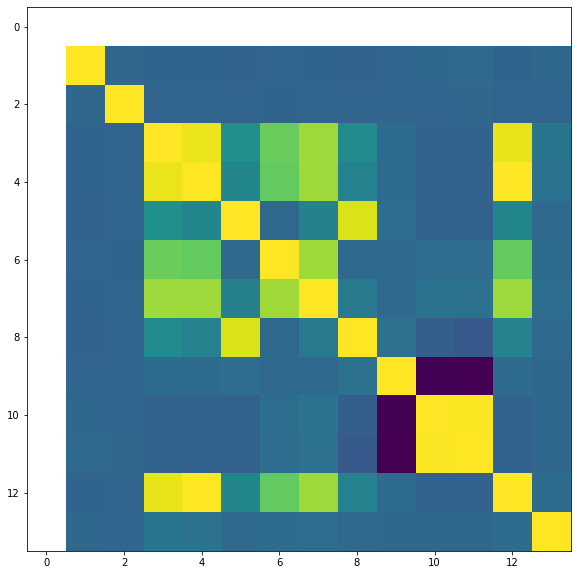

In [139]:
plt.figure(figsize=(10, 10))

plt.imshow(flights.corr().values)
plt.show()

El paquete seaborn tiene un mejor método para esto

<ipython-input-144-8665b4f05bda>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(flights.corr(), annot=True, linewidths = 0.2, linecolor = 'white')


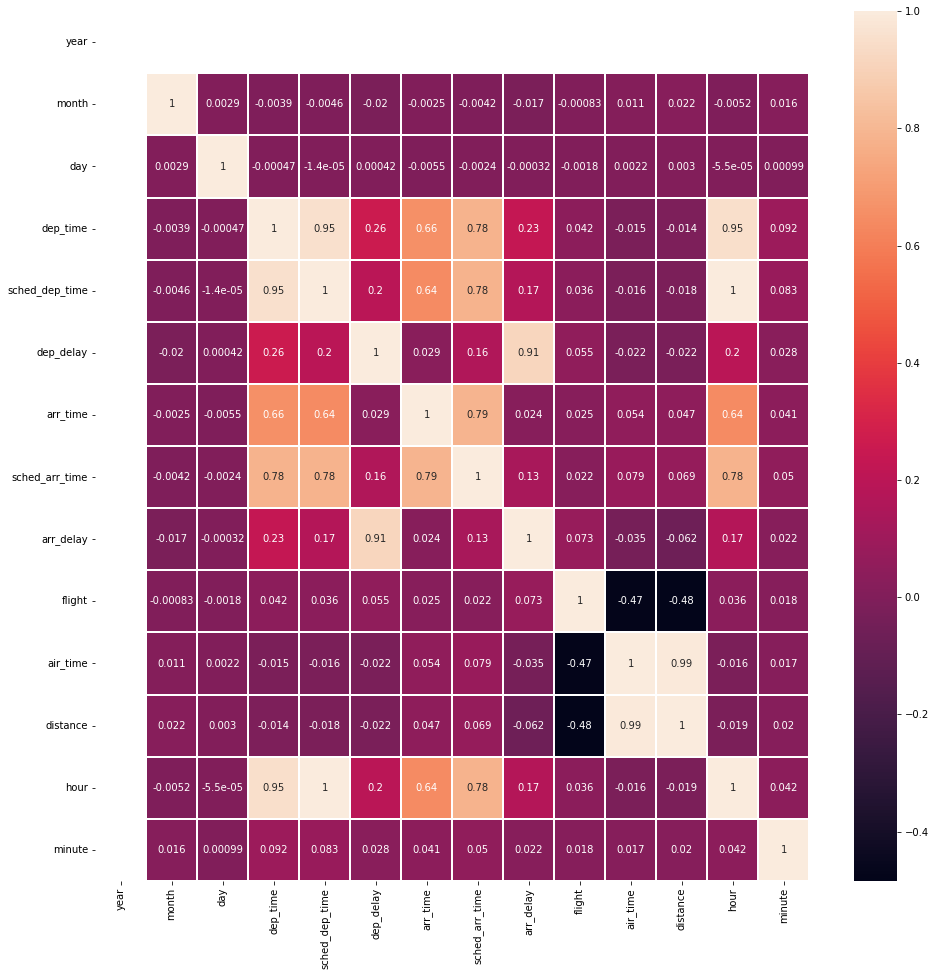

In [144]:
plt.figure(figsize=(16, 16))
sns.heatmap(flights.corr(), annot=True, linewidths = 0.2, linecolor = 'white')
plt.show()

<ipython-input-145-8665b4f05bda>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(flights.corr(), annot=True, linewidths = 0.2, linecolor = 'white')


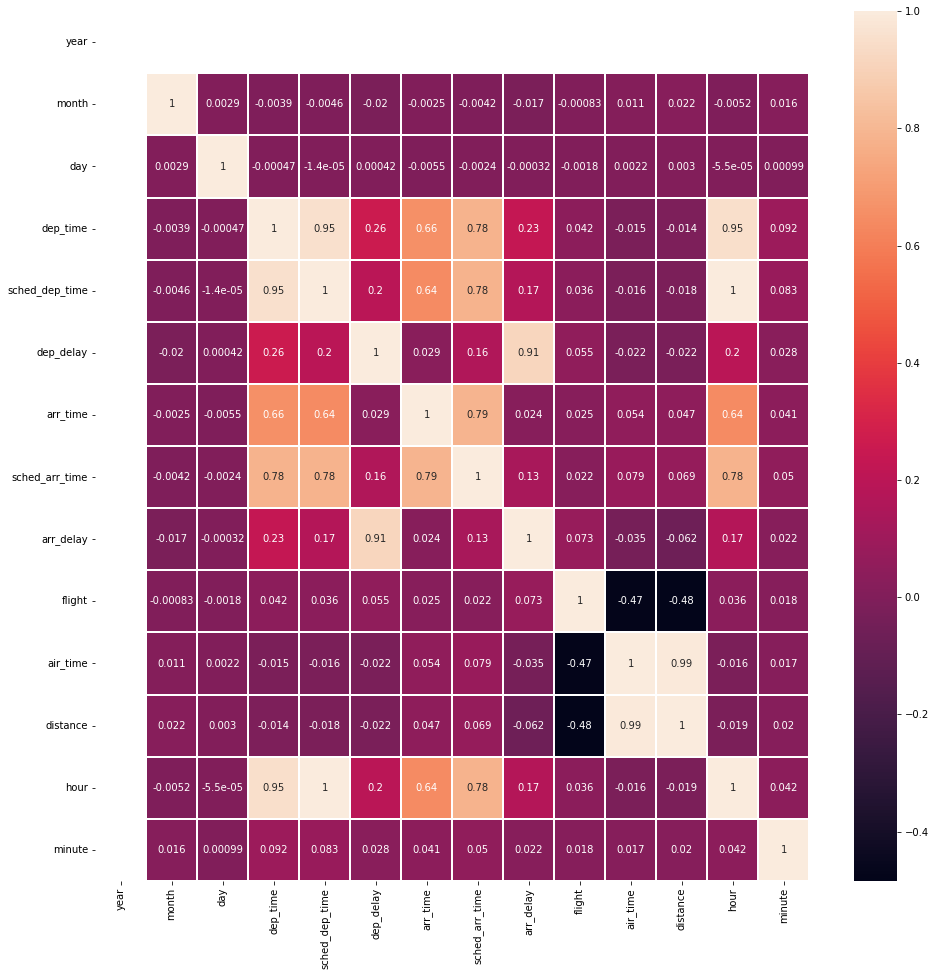

In [145]:
plt.figure(figsize=(16, 16))
sns.heatmap(flights.corr(), annot=True, linewidths = 0.2, linecolor = 'white')
plt.show()

En algunos casos (como en la presencia de outliers en los datos) la correlación de Pearson no es robusta.

En estos casos podemos usar la correlación de Spearman, que es robusta a los outliers. Esto lo podemos hacer simplemente cambiando el parámetro indicado en la función corr de pandas.

<ipython-input-151-e21eb0b2fbb6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(flights.corr(method='spearman'), annot=True, linewidths = 0.2, linecolor = 'white')


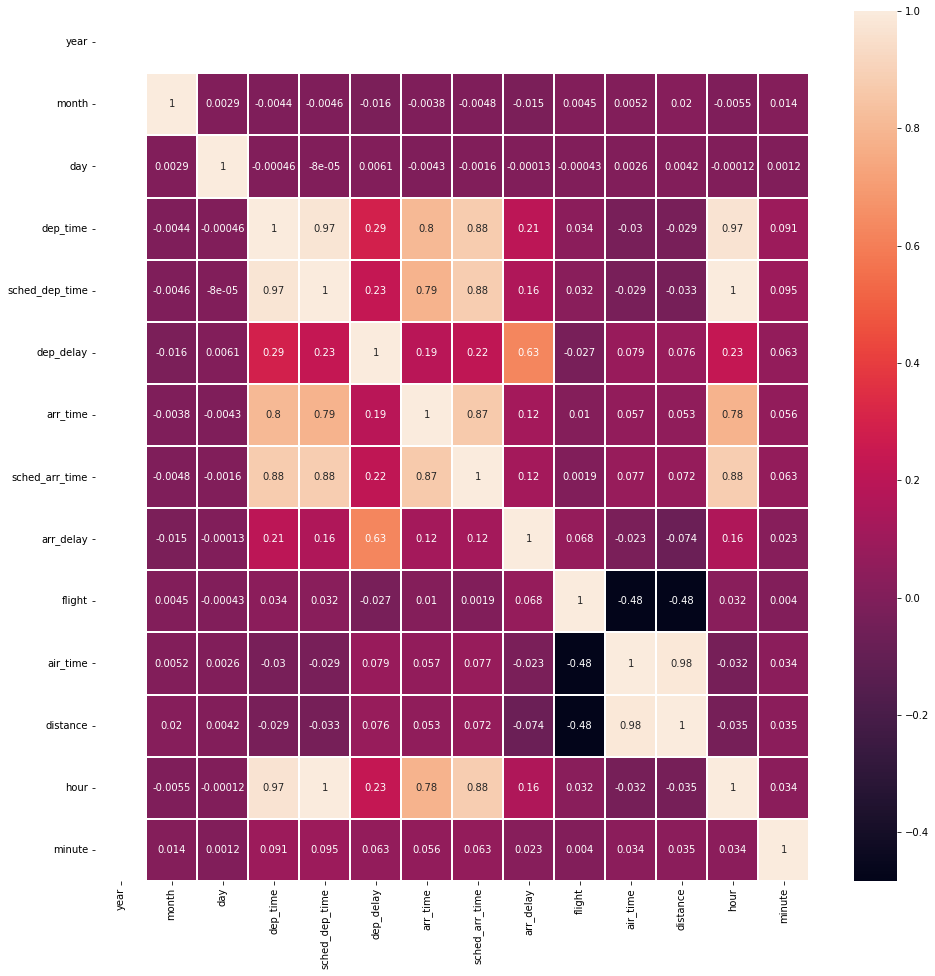

In [151]:
plt.figure(figsize=(16, 16))
sns.heatmap(flights.corr(method='spearman'), annot=True, linewidths = 0.2, linecolor = 'white')
plt.show()

También seaborn tiene una función interesante 'pairplot' que nos genera una matriz con las gráficas de todos los pares de variables

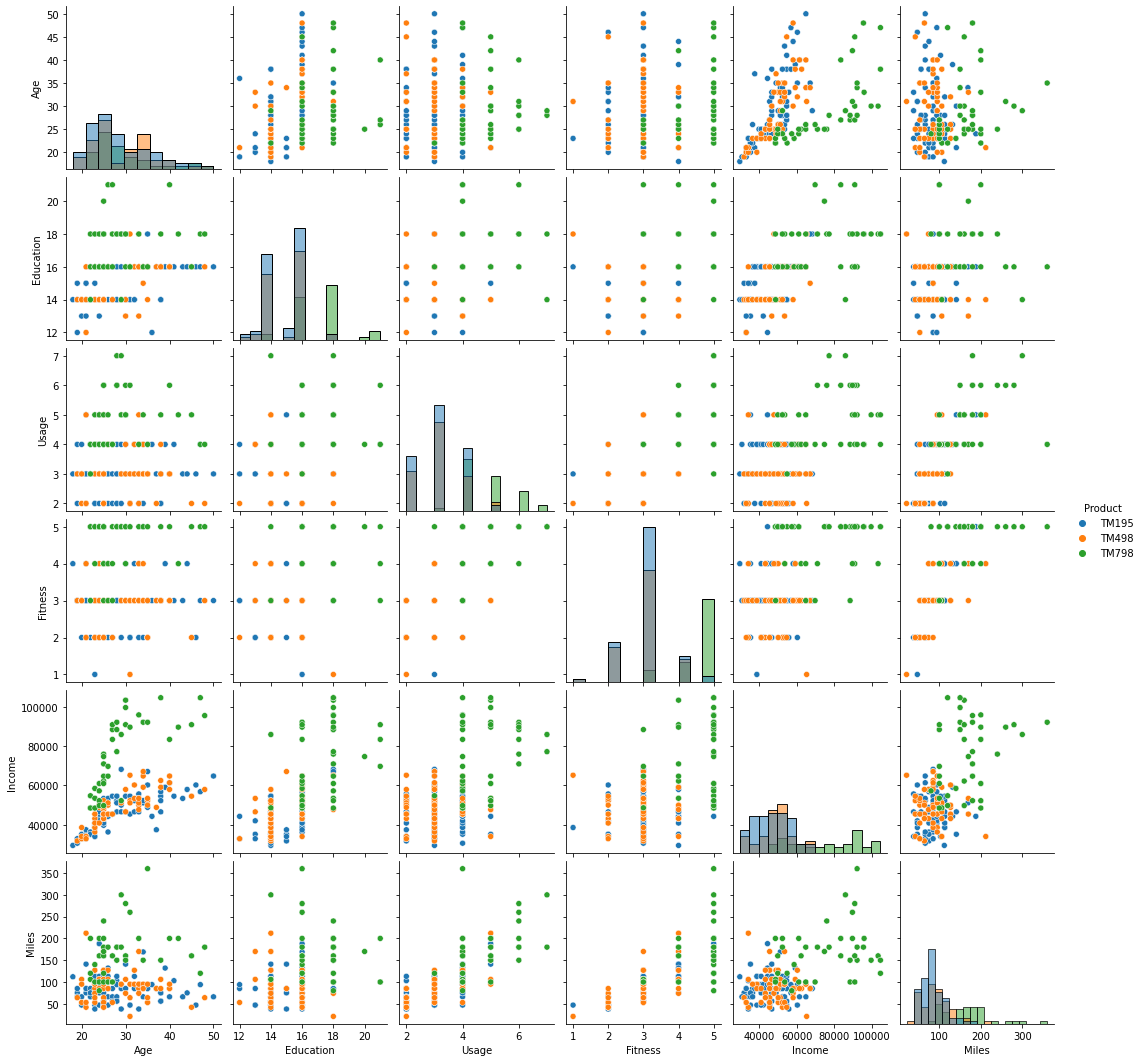

In [150]:
import seaborn as sns

df = pd.read_csv('data/CardioGoodFitness.csv')
df.Product = df.Product.astype('category')
df.Gender = df.Gender.astype('category')
df.MaritalStatus = df.MaritalStatus.astype('category')

sns.pairplot(df, hue="Product", diag_kind="hist")
plt.show()

## Ejercicio

Abre el archivo CardioGoodFitness.csv y haz un análisis bivariante de las combinaciones de variables, tanto continuas con continuas, categóricas con categóricas, como continuas con categóricas.

Representa una gráfica útil dependiendo del tipo de variables, así como estadísticos básicos para hacernos una idea de los datos. Intenta sacar algunas conclusiones acerca de las relaciones entre las variables.

Descripción del dataframe:

- Este conjunto de datos contiene información sobre la compra de cintas de correr por parte de los clientes

- Campos de datos:
    - Product - el número de modelo de la cinta de correr
    - Age - en número de años, del cliente
    - Gender - del cliente
    - Education - en número de años, del cliente
    - Marital Status - del cliente
    - Usage - Promedio. # de veces que el cliente quiere utilizar la cinta de correr cada semana
    - Fitness - Puntuación de la condición física del cliente (5 - muy buena, 1 - muy mala)
    - Income - del cliente
    - Miles - que se espera que corra

In [178]:
df = pd.read_csv('data/CardioGoodFitness.csv')
df.Product = df.Product.astype('category')
df.Gender = df.Gender.astype('category')
df.MaritalStatus = df.MaritalStatus.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


## Ejercicio

A partir del dataset housing.csv responde a las siguientes preguntas.

Recuerda que este dataset no contiene variables categóricas, por lo que vamos a discretizar la variable median_house_value en 5 quantiles.

Recuerda hacer algo con los valores faltantes.

In [295]:
df = pd.read_csv('data/housing.csv')
df.median_house_value = pd.qcut(df.median_house_value, 5, labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])
df = df.drop(columns='ocean_proximity')
df.total_bedrooms = df.total_bedrooms.fillna(df.total_bedrooms.median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20640 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  category
dtypes: category(1), float64(8)
memory usage: 1.3 MB


1.- ¿Existe alguna relación entre las variables longitude y latitude?¿Sabrías decir cuál?

2.- ¿La variable población es independiente de la variable longitude?¿Y de la variable latitude?

3.- ¿La población influye en la mediana del valor de las casas (median_house_value)?

4.- Comprueba si la mediana de la edad de los edificios influye en su valor.

5.- ¿El número de habitaciones influye en el precio?¿Y el número de dormitorios?

6.- ¿Existe alguna relación entre la latitud o la longitud y el número de dormitorios?

7.- ¿El número de hogares depende de la edad del edificio?¿Y de la zona donde se encuentran?

8.- ¿La mediana de los ingresos influye en el precio de los hogares donde viven?

9.- Estudia el efecto de la localización sobre la mediana del valor de los hogares (median_house_value).

10.- ¿El número de hogares tiene alguna relación con la población?¿Y con el total de habitaciones y dormitorios?